In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Season_averages_NBA_1960-2023.csv')

In [3]:
data = data[data['season'] >= 2013]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5999 entries, 17073 to 23071
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     5999 non-null   int64  
 1   games_played   5999 non-null   int64  
 2   player_id      5999 non-null   int64  
 3   season         5999 non-null   int64  
 4   min            5999 non-null   object 
 5   fgm            5999 non-null   float64
 6   fga            5999 non-null   float64
 7   fg3m           5999 non-null   float64
 8   fg3a           5999 non-null   float64
 9   ftm            5999 non-null   float64
 10  fta            5999 non-null   float64
 11  oreb           5999 non-null   float64
 12  dreb           5999 non-null   float64
 13  reb            5999 non-null   float64
 14  ast            5999 non-null   float64
 15  stl            5999 non-null   float64
 16  blk            5999 non-null   float64
 17  turnover       5999 non-null   float64
 18  pf      

In [18]:
initial_data = data.iloc[:, [1, 3, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22]]

In [19]:
initial_data

,games_played,season,oreb,dreb,ast,stl,blk,turnover,pf,pts,fg_pct,fg3_pct,ft_pct
17073,41,2013,0.488,2.049,4.854,0.927,0.195,2.317,1.585,10.146,0.415,0.438,0.746
17074,36,2014,0.222,0.944,1.861,0.556,0.139,0.889,1.444,4.639,0.386,0.361,0.909
17075,12,2015,0.333,1.750,3.083,1.250,0.167,1.500,1.833,9.167,0.420,0.356,1.000
17076,2,2016,0.500,1.000,4.500,1.000,0.000,1.500,0.500,6.000,0.333,0.444,0.000
17077,52,2013,1.692,2.308,0.692,0.192,0.423,0.615,1.827,3.346,0.475,0.000,0.690
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23067,18,2023,0.444,1.111,1.111,0.500,0.333,0.556,0.944,4.111,0.424,0.375,0.857
23068,53,2023,0.887,3.189,1.755,0.849,0.774,1.491,2.170,8.340,0.445,0.366,0.702
23069,14,2023,0.714,1.357,0.286,0.214,0.000,0.143,0.571,6.786,0.492,0.286,0.786
23070,7,2023,0.857,1.000,0.857,0.000,0.143,0.429,0.714,4.143,0.611,0.250,1.000


In [31]:
from sklearn.preprocessing import StandardScaler

In [34]:
scalar = StandardScaler()
scaled_features = scalar.fit_transform(initial_data)

In [21]:
from sklearn.cluster import KMeans

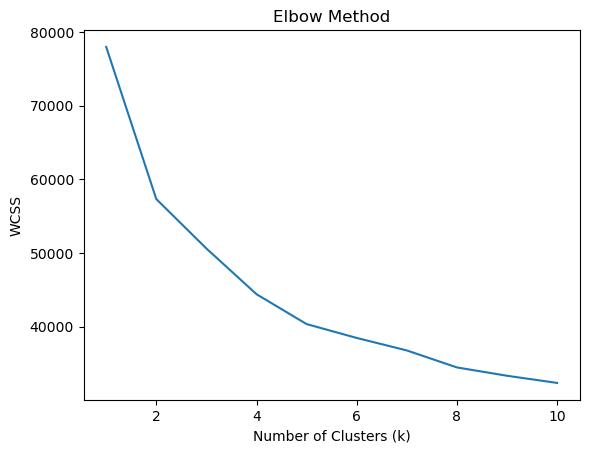

In [35]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1123).fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [38]:
optimal_k = 8  # Assume you found k=8 from the Elbow or Silhouette method
kmeans = KMeans(n_clusters=optimal_k, random_state=1123)
data['Cluster'] = kmeans.fit_predict(initial_data)

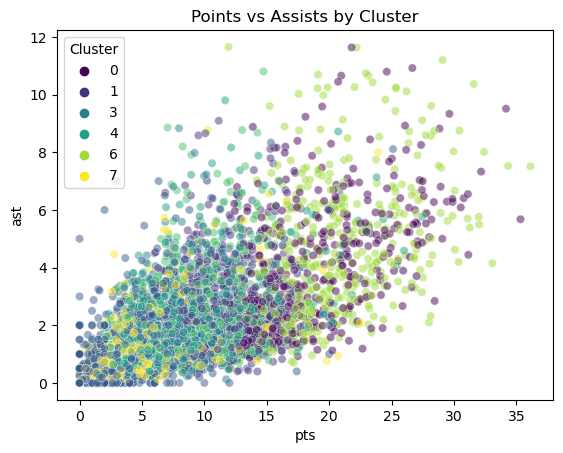

In [43]:
sns.scatterplot(data=data, x='pts', y='ast', hue='Cluster', palette='viridis', alpha = 0.5)
plt.title('Points vs Assists by Cluster')
plt.show()

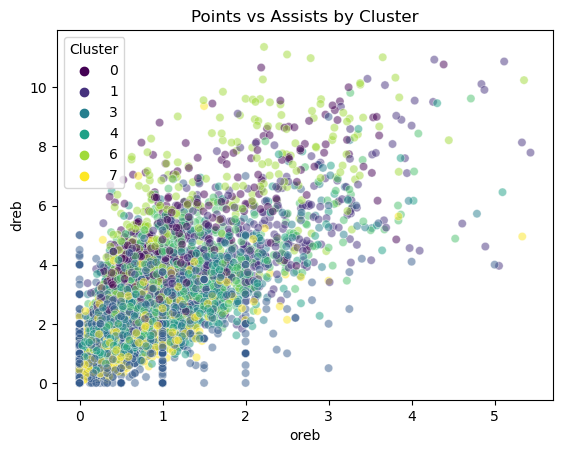

In [44]:
sns.scatterplot(data=data, x='oreb', y='dreb', hue='Cluster', palette='viridis', alpha = 0.5)
plt.title('Points vs Assists by Cluster')
plt.show()